# Desafio - Fernando Navarrete

# 1. Cargar datos

In [49]:
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd   

In [3]:
data = pd.read_csv("caudal_extra.csv", sep=",",parse_dates=["fecha"])

# 2. Análisis data

In [4]:
data.head(10)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN
1,1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN
2,2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN
3,3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN
4,4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN
5,5,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-27,0.822,4540001,Rio Grande En Paloma 1,0.0,NaN
6,6,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-09-16,0.910,4540001,Rio Grande En Paloma 1,0.0,NaN
7,7,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-10-31,2.070,4540001,Rio Grande En Paloma 1,0.0,NaN
8,8,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-11-26,4.410,4540001,Rio Grande En Paloma 1,0.0,NaN
9,9,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-12-04,5.480,4540001,Rio Grande En Paloma 1,0.0,NaN


In [5]:
data.describe(include=['object'])

,institucion,fuente,nombre,nombre_sub_cuenca,gauge_name
count,1411180,1411180,1411180,1411180,1411180
unique,1,1,133,78,133
top,DGA,dga_web,Rio Aconcagua En Chacabuquito,Rio Loa Alto (Bajo Junta Rio Salado),Rio Aconcagua En Chacabuquito
freq,1411180,1411180,20706,64164,20706


In [6]:
data.describe().apply(lambda x: x.apply(lambda y: format(y, 'f'))) #ver data de manera amigable

,Unnamed: 0,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1411180.000000,1411180.000000,1411180.000000,1411180.000000,1411180.000000,1411180.000000,1411180.000000,1411180.000000,1411180.000000,1383413.000000,1259617.000000
mean,705589.500000,6279952.529579,585.569072,-33.677482,-71.218264,62.558813,15739.832250,95.522288,6279952.529579,1.921009,19.211095
std,407372.720776,2891694.906529,865.268160,6.940820,1.174363,28.399213,7545.197014,252.633749,2891694.906529,7.361936,7.307081
min,0.000000,1020003.000000,0.000000,-54.041100,-73.283302,10.000000,802.000000,0.000000,1020003.000000,0.000000,-19.049999
25%,352794.750000,4320001.000000,45.000000,-37.211899,-72.068100,43.000000,10255.000000,1.250000,4320001.000000,0.000000,13.700000
50%,705589.500000,5734001.000000,395.000000,-33.593899,-71.254700,57.000000,14889.000000,8.950000,5734001.000000,0.000000,19.084286
75%,1058384.250000,8308000.000000,750.000000,-29.945801,-70.532799,83.000000,20611.000000,69.700000,8308000.000000,0.000000,25.200001
max,1411179.000000,12876004.000000,4370.000000,-18.232500,-68.143898,128.000000,36667.000000,15805.000000,12876004.000000,258.600006,41.500000


Empezamos a ver de mananera general como estan distribuidas las variables

In [7]:
data.codigo_estacion.nunique() #hay 133 estaciones


133

In [8]:
data.institucion.unique() #por lo tanto esta variable es inutil, ya que es unica

array(['DGA'], dtype=object)

In [9]:
data.fuente.unique() #por lo tanto esta variable es inutil, ya que es unica

array(['dga_web'], dtype=object)

In [10]:
data.nombre.nunique() #igual a codigo_estacion

133

In [11]:
data.gauge_name.nunique() #igual a nombre

133

In [12]:
data.nombre_sub_cuenca.nunique() #hay varios nombres de subcuencas

78

In [13]:
data.gauge_id.nunique() #igual a codigo estación

133

Ahora ya sabemos que eliminar para pulir la data

In [14]:
data = data.drop(["Unnamed: 0","institucion","fuente","gauge_name","gauge_id"],axis=1)

Analisis variable nula temp_max_promedio

In [15]:
dataAux = data[data.isnull().any(axis=1)].groupby("nombre")
dataAux.apply(lambda data: data.sort_values(by=['fecha'])).head()


codigo_estacion  \
nombre                                                     
Estero Camisas En Desembocadura 1067700          4714001   
                                1067096          4714001   
                                1069347          4714001   
                                1064644          4714001   
                                1065639          4714001   

                                                                  nombre  \
nombre                                                                     
Estero Camisas En Desembocadura 1067700  Estero Camisas En Desembocadura   
                                1067096  Estero Camisas En Desembocadura   
                                1069347  Estero Camisas En Desembocadura   
                                1064644  Estero Camisas En Desembocadura   
                                1065639  Estero Camisas En Desembocadura   

                                         altura  latitud   longitud  \
nombre                                                                
Estero Camisas En Desembocadura 1067700     400 -31.7714 -71.063904   
                                1067096     400 -31.7714 -71.063904   
                                1069347     400 -31.7714 -71.063904   
                                1064644     400 -31.7714 -71.063904   
                                1065639     400 -31.7714 -71.063904   

                                         codigo_cuenca  \
nombre                                                   
Estero Camisas En Desembocadura 1067700             47   
                                1067096             47   
                                1069347             47   
                                1064644             47   
                                1065639             47   

                                                                        nombre_sub_cuenca  \
nombre                                                                                      
Estero Camisas En Desembocadura 1067700  Rio Choapa Medio (Entre Rios Cuncumen E Illapel)   
                                1067096  Rio Choapa Medio (Entre Rios Cuncumen E Illapel)   
                                1069347  Rio Choapa Medio (Entre Rios Cuncumen E Illapel)   
                                1064644  Rio Choapa Medio (Entre Rios Cuncumen E Illapel)   
                                1065639  Rio Choapa Medio (Entre Rios Cuncumen E Illapel)   

                                         cantidad_observaciones      fecha  \
nombre                                                                       
Estero Camisas En Desembocadura 1067700                   10144 1969-08-11   
                                1067096                   10144 1969-08-12   
                                1069347                   10144 1969-08-13   
                                1064644                   10144 1969-08-14   
                                1065639                   10144 1969-08-15   

                                         caudal  precip_promedio  \
nombre                                                             
Estero Camisas En Desembocadura 1067700   0.224              0.0   
                                1067096   0.224              0.0   
                                1069347   0.224              0.0   
                                1064644   0.224              0.0   
                                1065639   0.224              0.0   

                                         temp_max_promedio  
nombre                                                      
Estero Camisas En Desembocadura 1067700                NaN  
                                1067096                NaN  
                                1069347                NaN  
                                1064644                NaN  
                                1065639                NaN

In [16]:
data2 = data.drop(["temp_max_promedio"],axis=1)
dataAux2 = data2[data2.isnull().any(axis=1)].groupby("nombre")
dataAux2.apply(lambda dataAux: dataAux.sort_values(by=['fecha'],ascending=False)).head()

codigo_estacion  \
nombre                                                              
Estero Curipeumo En Lo Hernandez         1239855          7335002   
                                         1233869          7335002   
                                         1243763          7335002   
Estero Los Puercos En Puente Los Puercos 1181426          7381001   
                                         1170939          7381001   

                                                                                    nombre  \
nombre                                                                                       
Estero Curipeumo En Lo Hernandez         1239855          Estero Curipeumo En Lo Hernandez   
                                         1233869          Estero Curipeumo En Lo Hernandez   
                                         1243763          Estero Curipeumo En Lo Hernandez   
Estero Los Puercos En Puente Los Puercos 1181426  Estero Los Puercos En Puente Los Puercos   
                                         1170939  Estero Los Puercos En Puente Los Puercos   

                                                  altura    latitud  \
nombre                                                                
Estero Curipeumo En Lo Hernandez         1239855       0 -35.966702   
                                         1233869       0 -35.966702   
                                         1243763       0 -35.966702   
Estero Los Puercos En Puente Los Puercos 1181426     113 -35.373600   
                                         1170939     113 -35.373600   

                                                   longitud  codigo_cuenca  \
nombre                                                                       
Estero Curipeumo En Lo Hernandez         1239855 -72.016701             73   
                                         1233869 -72.016701             73   
                                         1243763 -72.016701             73   
Estero Los Puercos En Puente Los Puercos 1181426 -71.829201             43   
                                         1170939 -71.829201             43   

                                                                                  nombre_sub_cuenca  \
nombre                                                                                                
Estero Curipeumo En Lo Hernandez         1239855  Rio Perquilauquen Alto (Bajo Junta Rio Cauquenes)   
                                         1233869  Rio Perquilauquen Alto (Bajo Junta Rio Cauquenes)   
                                         1243763  Rio Perquilauquen Alto (Bajo Junta Rio Cauquenes)   
Estero Los Puercos En Puente Los Puercos 1181426   Rio Maule Bajo (Entre Rio Claro Y Desembocadura)   
                                         1170939   Rio Maule Bajo (Entre Rio Claro Y Desembocadura)   

                                                  cantidad_observaciones  \
nombre                                                                     
Estero Curipeumo En Lo Hernandez         1239855                   16570   
                                         1233869                   16570   
                                         1243763                   16570   
Estero Los Puercos En Puente Los Puercos 1181426                   10936   
                                         1170939                   10936   

                                                      fecha  caudal  \
nombre                                                                
Estero Curipeumo En Lo Hernandez         1239855 2000-02-29   2.460   
                                         1233869 1997-07-11   2.690   
                                         1243763 1984-05-13   3.020   
Estero Los Puercos En Puente Los Puercos 1181426 2017-03-02   0.653   
                                         1170939 2017-03-01   0.641   

                                                  precip_promedio  
nombre                                   

Dado que la cantidad de observaciones varía mucho dependiendo de codigo_estacion. Se procede a organizar estas respecto a bloques en zonas similares para equiparar la cantidad de data. Ademas, estas zonas tienen comportamientos distintos. Ya que por ejemplo, si una coordenada se encuentra en un valle costero tiene distinto comportamiento a si estuviera en plena coordillera. Esto con la finalidad de tener otro parametro al momento de ver el comportamiento de los datos (percentil y epoca del año). 
Con la finalidad de ahorrar tiempo (aunque se puede hacer) le dare valores aleatoreos entre 1 a 4 para definir su zona y comportamiento

                                        Costa
               2                        |                         1
                                        |
                 Valle costero          |      coordillera costa
                                        |
                                        |
            ---------------------------------------------------------- Montaña
                3                       |                            4
                                        |
                 valle central          |     coordillera andes
                                        |
                                        |
Haciendo esto tambien se me ocurrio que la región en la que esten dispuestas las coordenadas tambien influyen. Si es del norte grande es distinto a si es del Bio-Bio, pero para no alargar mas el dataset solo queda planteado como feature

*A MODO DE RESUMEN, A LOS DATOS YA ESTABLECIDOS, SE PUEDEN AGREGAR VARIABLES TALES COMO 
REGION POLITICA, Y ZONA GEOGRAFICA PARA VER SU COMPORTAMIENTO EN ESTAS

In [17]:
dataAux2 = data2.groupby(["codigo_estacion","latitud","longitud"]).agg({'count'})

In [18]:
dataAux2 #aqui podemos ver preliminarmente como estan agrupados los datos y sus cantidades

,,,nombre,altura,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,precip_promedio
,,,count,count,count,count,count,count,count,count
codigo_estacion,latitud,longitud,,,,,,,,
1020003,-18.232500,-69.331902,12194,12194,12194,12194,12194,12194,12194,12194
1021001,-18.583300,-69.046700,12043,12043,12043,12043,12043,12043,12043,12043
1050004,-20.111900,-68.840797,10943,10943,10943,10943,10943,10943,10943,10843
1211001,-18.400000,-70.300003,8780,8780,8780,8780,8780,8780,8780,8750
2103003,-21.936899,-68.533096,2596,2596,2596,2596,2596,2596,2596,2596
2104002,-22.027800,-68.620796,13159,13159,13159,13159,13159,13159,13159,13159
2104003,-21.975599,-68.607498,9131,9131,9131,9131,9131,9131,9131,9131
2105001,-22.279200,-68.242798,13251,13251,13251,13251,13251,13251,13251,13251


Al ver la cercania de las estaciones y en post del tiempo. Solo se dejará planteada la idea de agrupar, ya que requiere un mayor analisis para generar los grupos de lo que creí, otro feature

In [19]:
tmp = data["temp_max_promedio"].dropna()
caudal = data["caudal"] #Caudal no tiene valores NaN
lluvia = data["precip_promedio"].dropna()

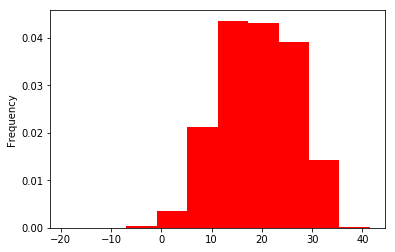

In [20]:
tmp.plot(kind='hist', color="red",density=True)

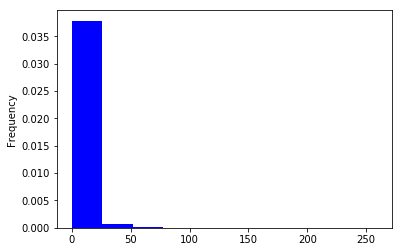

In [21]:
lluvia.plot(kind='hist', color="blue",density=True)

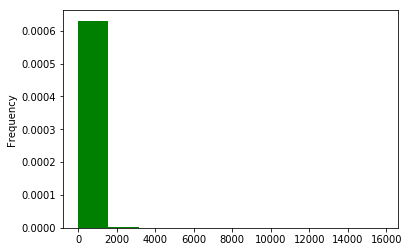

In [22]:
caudal.plot(kind='hist', color="green",density=True)

#### Apreciacion final:
Los NaN en precip_promedio  parecen explicarse por una simple falta de disponibilidad de información, sensores rotos, falta de indumentaria, etc. La mayor cantidad de valores faltantes en temp_max_promedio se explica porque en la producción de la base de datos se decidió contar con una única medición de temperatura por día

En las variables relevantes, se observa una cola tanto en la distribución del caudal como la precipitación promedio, mostrando un comportamiento similar a una distribución exponencial. La distribución de la temperatura promedio máxima es multimodal, lo que se podría explicar por las diferentes estaciones del año.

# 3.a Escribir una función que tome como input una estación y haga plot de los datos para



comentario: generalmente doy el dataframe como parametro, pero dado que dieron una maqueta de funcion preferi seguirla

In [23]:
def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    # filtrar por fechas, enunciado
    dataAux = data[(data.fecha>=fecha_min) & (data.fecha <=fecha_max)].query("codigo_estacion=={}".format(codigo_estacion))
    #por el ejemplo de la parte B se asume promedios por fechas
    promedio = dataAux.groupby("fecha").mean()[columna]
    #Nota: De acuerdo al ejemplo, se grafica una línea de tendencia y no un scatter plot
    plt.plot_date(ls="-",marker="None",x=promedio.index.values, y=promedio.values)
    plt.suptitle("Grafico de {} en la estación {}".format(columna,codigo_estacion))
  


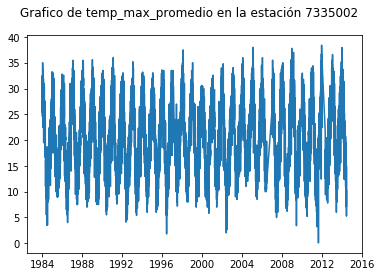

In [24]:
time_plot_una_estacion(7335002,"temp_max_promedio","1984-01","2014-07")


# 3.b Escribir una función que tome como input varias estaciones y haga plot de los datos 


In [51]:
def time_plot_estaciones_varias_columnas(codigo_estacion,columnas, fecha_min, fecha_max):
    #filtrar por fechas, enunciado
    dataAux = data[(data.fecha>=fecha_min) & (data.fecha <=fecha_max)].query("codigo_estacion=={}".format(codigo_estacion))
    #misma logica anterior
    promedio = dataAux.groupby("fecha").mean()[columnas]
    promedio = promedio.divide(promedio.iloc[0]/100)
    #
    plt.plot_date(ls="-",marker="None",x=promedio.index.values, y=promedio.values)
    plt.suptitle("Estación [{}]. Columnas normalizadas a 100".format(codigo_estacion))
    plt.legend(columnas)

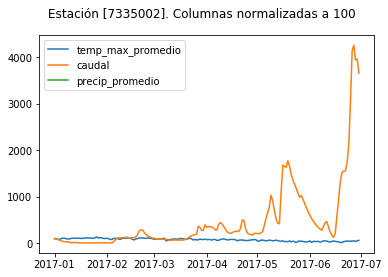

In [26]:
time_plot_estaciones_varias_columnas(7335002,["temp_max_promedio","caudal","precip_promedio"],"2017-01","2017-07")

In [37]:
data=data.dropna() #eliminamos las filas nulas ya que entorpecen el funcionamiento

#  4. Variables nuevas

In [38]:
data["caudal_extremo"]=0
data["temp_extremo"]=0
data["precip_extremo"]=0
data["estacion"] =""

#Se crea otra columna que indica la estacion ;- 1: verano, 2:otoño, 3:invierno, 4:primavera
data['estacion'] = data['fecha'].dt.month
#Por simplicidad supondremos que los cambios de estación se hacen al comienzo del mes.
season = ['verano', 'verano', 'verano', 'otoño', 'otoño', 'otoño', 'invierno', 'invierno', 'invierno', 'primavera', 'primavera', 'primavera']
# Creamos un diccionario que convierta los meses en las estaciones
month_to_season = dict(zip(range(1,13), season))
data["estacion"] = data["estacion"].map(month_to_season)
#caudales extremos por estacion

filter = data.groupby(["codigo_estacion","estacion"]).apply(lambda x: pd.eval("x.caudal > x.caudal.quantile(.95)"))
filter.index = filter.index.droplevel([0,1])
data.loc[filter, "caudal_extremo"]=1 #Localiza índices del filtro

filter = data.groupby(["codigo_estacion","estacion"]).apply(lambda x: pd.eval("x.temp_max_promedio > x.temp_max_promedio.quantile(.95)"))
filter.index = filter.index.droplevel([0,1])
data.loc[filter, "temp_extremo"]=1 #Localiza índices del filtro

filter = data.groupby(["codigo_estacion","estacion"]).apply(lambda x: pd.eval("x.precip_promedio > x.precip_promedio.quantile(.95)"))
filter.index = filter.index.droplevel([0,1])
data.loc[filter, "precip_extremo"]=1 #Localiza índices del filtro


In [39]:
data.groupby(["codigo_estacion","estacion"])["caudal_extremo"].describe()

count      mean       std  min  25%  50%  75%  max
codigo_estacion estacion                                                      
1020003         invierno   2771.0  0.050162  0.218319  0.0  0.0  0.0  0.0  1.0
                otoño      2824.0  0.050283  0.218568  0.0  0.0  0.0  0.0  1.0
                primavera  2739.0  0.050018  0.218022  0.0  0.0  0.0  0.0  1.0
                verano     2807.0  0.050232  0.218461  0.0  0.0  0.0  0.0  1.0
1021001         invierno   2325.0  0.049892  0.217770  0.0  0.0  0.0  0.0  1.0
                otoño      2339.0  0.050021  0.218036  0.0  0.0  0.0  0.0  1.0
                primavera  2591.0  0.050174  0.218345  0.0  0.0  0.0  0.0  1.0
                verano     2279.0  0.050022  0.218038  0.0  0.0  0.0  0.0  1.0
1050004         invierno   2614.0  0.050115  0.218223  0.0  0.0  0.0  0.0  1.0
                otoño      2759.0  0.050018  0.218022  0.0  0.0  0.0  0.0  1.0
                primavera  2589.0  0.050212  0.218425  0.0  0.0  0.0  0.0  1.0
                verano     2447.0  0.050266  0.218537  0.0  0.0  0.0  0.0  1.0
1211001         invierno   1887.0  0.046635  0.210911  0.0  0.0  0.0  0.0  1.0
                otoño      1701.0  0.049971  0.217948  0.0  0.0  0.0  0.0  1.0
                primavera  1629.0  0.050338  0.218708  0.0  0.0  0.0  0.0  1.0
                verano     1831.0  0.049700  0.217383  0.0  0.0  0.0  0.0  1.0
2103003         invierno    632.0  0.049051  0.216145  0.0  0.0  0.0  0.0  1.0
                otoño       677.0  0.044313  0.205942  0.0  0.0  0.0  0.0  1.0
                primavera   690.0  0.047826  0.213553  0.0  0.0  0.0  0.0  1.0
                verano      564.0  0.051418  0.221046  0.0  0.0  0.0  0.0  1.0
2104002         invierno   3126.0  0.049904  0.217782  0.0  0.0  0.0  0.0  1.0
                otoño      3279.0  0.050015  0.218010  0.0  0.0  0.0  0.0  1.0
                primavera  3151.0  0.050143  0.218274  0.0  0.0  0.0  0.0  1.0
                verano     3264.0  0.051777  0.221610  0.0  0.0  0.0  0.0  1.0
2104003         invierno   2320.0  0.047414  0.212568  0.0  0.0  0.0  0.0  1.0
                otoño      2255.0  0.037694  0.190497  0.0  0.0  0.0  0.0  1.0
                primavera  2341.0  0.047416  0.212572  0.0  0.0  0.0  0.0  1.0
                verano     2175.0  0.049195  0.216326  0.0  0.0  0.0  0.0  1.0
2105001         invierno   3385.0  0.050222  0.218434  0.0  0.0  0.0  0.0  1.0
                otoño      3239.0  0.049707  0.217372  0.0  0.0  0.0  0.0  1.0
...                           ...       ...       ...  ...  ...  ...  ...  ...
11542001        primavera  1564.0  0.050512  0.219068  0.0  0.0  0.0  0.0  1.0
                verano     1472.0  0.050272  0.218579  0.0  0.0  0.0  0.0  1.0
11545000        invierno   1019.0  0.050049  0.218153  0.0  0.0  0.0  0.0  1.0
                otoño      1211.0  0.050372  0.218801  0.0  0.0  0.0  0.0  1.0
                primavera  1302.0  0.050691  0.219451  0.0  0.0  0.0  0.0  1.0
                verano     1204.0  0.050664  0.219403  0.0  0.0  0.0  0.0  1.0
11710000        invierno    731.0  0.049248  0.216533  0.0  0.0  0.0  0.0  1.0
                otoño       876.0  0.050228  0.218540  0.0  0.0  0.0  0.0  1.0
                primavera   666.0  0.051051  0.220267  0.0  0.0  0.0  0.0  1.0
                verano      725.0  0.049655  0.217381  0.0  0.0  0.0  0.0  1.0
11711000        invierno    985.0  0.050761  0.219622  0.0  0.0  0.0  0.0  1.0
                otoño       979.0  0.050051  0.218162  0.0  0.0  0.0  0.0  1.0
                primavera  1008.0  0.050595  0.219279  0.0  0.0  0.0  0.0  1.0
                verano      918.0  0.047930  0.213735  0.0  0.0  0.0  0.0  1.0
12284007        invierno   2314.0  0.050130  0.218260  0.0  0.0  0.0  0.0  1.0
                otoño      2265.0  0.050331  0.218676  0.0  0.0  0.0  0.0  1.0
                primavera  2314.0  0.049697  0.217366  0.0  0.0  0.0  0.0  1.0
                verano     2349.0  0.049808  0.217595  0.0  0.0  0.0  0.0  1.0

Analisis:
Luego de haber calculado me parece apropiado el uso del percentil 95 pero incompleto. Hay que agregarle la variable zona (pregunta 2) para poder conseguir un valor mas exacto en el coomportamiento de los extremos.

# 5. Analisis de caudal_extremo

In [41]:
data.groupby(["codigo_estacion","caudal_extremo"]).mean()

altura    latitud   longitud  codigo_cuenca  \
codigo_estacion caudal_extremo                                                
1020003         0               4370.0 -18.232500 -69.331902           10.0   
                1               4370.0 -18.232500 -69.331902           10.0   
1021001         0               3907.0 -18.583300 -69.046700           10.0   
                1               3907.0 -18.583300 -69.046700           10.0   
1050004         0               3853.0 -20.111900 -68.840797           10.0   
                1               3853.0 -20.111900 -68.840797           10.0   
1211001         0                 10.0 -18.400000 -70.300003           12.0   
                1                 10.0 -18.400000 -70.300003           12.0   
2103003         0               3320.0 -21.936899 -68.533096           21.0   
                1               3320.0 -21.936899 -68.533096           21.0   
2104002         0               2950.0 -22.027800 -68.620796           21.0   
                1               2950.0 -22.027800 -68.620796           21.0   
2104003         0               2932.0 -21.975599 -68.607498           21.0   
                1               2932.0 -21.975599 -68.607498           21.0   
2105001         0               3080.0 -22.279200 -68.242798           21.0   
                1               3080.0 -22.279200 -68.242798           21.0   
2105002         0               2980.0 -22.289400 -68.344704           21.0   
                1               2980.0 -22.289400 -68.344704           21.0   
2105005         0               2500.0 -22.365299 -68.641899           21.0   
                1               2500.0 -22.365299 -68.641899           21.0   
2105007         0                  0.0 -22.273100 -68.143898           21.0   
                1                  0.0 -22.273100 -68.143898           21.0   
2110001         0               2450.0 -22.441900 -68.888603           32.0   
                1               2450.0 -22.441900 -68.888603           32.0   
2110002         0               2300.0 -22.446899 -68.877502           32.0   
                1               2300.0 -22.446899 -68.877502           32.0   
2110004         0               2100.0 -22.506100 -68.988899           32.0   
                1               2100.0 -22.506100 -68.988899           32.0   
2110031         0               2470.0 -22.458300 -68.736397           32.0   
                1               2470.0 -22.458300 -68.736397           32.0   
...                                ...        ...        ...            ...   
11315001        0                224.0 -45.566700 -72.083298          113.0   
                1                224.0 -45.566700 -72.083298          113.0   
11317001        0                210.0 -45.551701 -72.068100          113.0   
                1                210.0 -45.551701 -72.068100          113.0   
11335002        0                270.0 -45.783298 -72.616699          113.0   
                1                270.0 -45.783298 -72.616699          113.0   
11337001        0                 21.0 -45.400002 -72.599998          113.0   
                1                 21.0 -45.400002 -72.599998          113.0   
11342001        0                 32.0 -45.405800 -72.623100          113.0   
                1                 32.0 -45.405800 -72.623100          113.0   
11530000        0                200.0 -47.066700 -72.800003          115.0   
                1                200.0 -47.066700 -72.800003          115.0   
11536004        0                160.0 -47.141399 -72.725800          115.0   
                1                160.0 -47.141399 -72.725800          115.0   
11542001        0                105.0 -47.349998 -72.849998          115.0   
                1                105.0 -47.349998 -72.849998          115.0   
11545000        0                 45.0 -47.500000 -72.974998          115.0   
                1                 45.0 -47.500000 -72.974998          115.0   
117

In [42]:
data.groupby(["caudal_extremo"]).temp_extremo.mean()

caudal_extremo
0    0.04967
1    0.02773
Name: temp_extremo, dtype: float64

In [43]:
data.groupby(["caudal_extremo"]).precip_extremo.mean()

caudal_extremo
0    0.040263
1    0.110442
Name: precip_extremo, dtype: float64

Ya con estos valores se tiene una idea superficial de que los caudales extremos si son similares. Como los datos extremos se asocian al 5% y estos valores se vieron cercanos al mismo (0.04967 & 040263)

# 6. Eventos en el tiempo

In [44]:
data["Año"] = data["fecha"].dt.year

In [45]:
dataAux = data.groupby(['Año'])[['caudal_extremo', 'precip_extremo', 'temp_extremo']].mean()

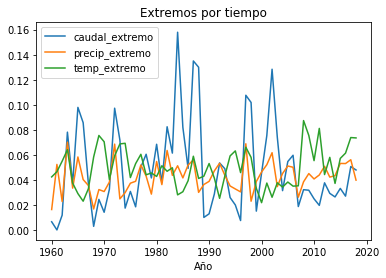

In [47]:
dataAux.plot(title = "Extremos por tiempo")

# 7. Prediccion caudal extremo

Dada la forma en que se capturan los datos, es mas seguro realizar una prediccion de manera semanal, asi que nuestra prediccion se usaran datos de dia luns a domingo de una semana para indicar la siguiente

In [52]:
sub = data[['fecha', 'codigo_estacion', 'caudal', 'precip_promedio', 'temp_max_promedio', 'precip_extremo', 'temp_extremo' ,'caudal_extremo']]
sub.reset_index(inplace=True)

*NOTA por temas de tiempo no se logro completar esta parte del desafio. Pero los conocimientos estan*
Para lo que resta del desafio se debe crear el data set con las variables historicas que alimentaran la misma. Estas son medias de los valores por mes y año. Desviacion estandar del ultimo mes y cantidad de eventos extremos registrados en un periodo de semana y mes.
Una vez la data limpia se procede a hacerle una regresion logistica y Random forest para comparar ambas tecnicas.
Una vez con los resultados se procede a comparar sus recall y precision (accuracy)
y una matriz de confusion para ver su sencibilidad y en base a eso ver el resultado 
b) Esta respuesta depende del resultado anterior asi que se omite

# RESPUESTAS PREGUNTAS CLAVE

## ¿Ha aumentado la frecuencia de olas de calor en Chile?

Si, en el grafico de la respuesta 6 se evidencia

## ¿Existe una relación entre olas de calor y eventos extremos de caudal?

No hay suficientes estudios aun para responder esto, preliminarmente por lo observado la respuesta serìa no.